In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
# import dataset

df = pd.read_csv('D:\\DS\\Probability Exam\\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# checking null data

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking outliers, std deviation, means and median etc

df.describe().round(1)

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.2,30.7,1.1,13270.4
std,14.0,6.1,1.2,12110.0
min,18.0,16.0,0.0,1121.9
25%,27.0,26.3,0.0,4740.3
50%,39.0,30.4,1.0,9382.0
75%,51.0,34.7,2.0,16639.9
max,64.0,53.1,5.0,63770.4


In [8]:
# here we noticed that charges column supposed to dont have a normal distribution. Let's take a look further

In [9]:
# styling

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

<Axes: xlabel='bmi', ylabel='Density'>

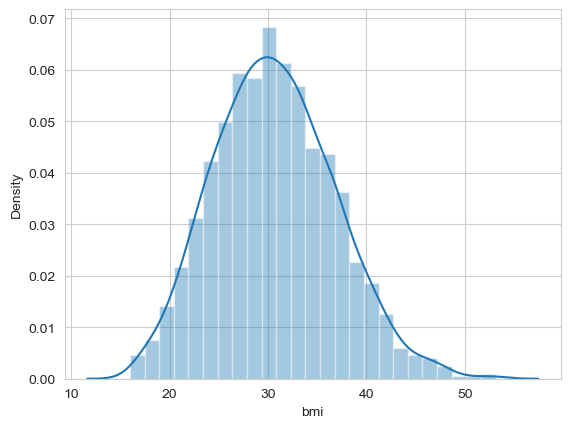

In [10]:
# looking at BMI distribution

sns.distplot(df['bmi'])

<Axes: xlabel='age', ylabel='Density'>

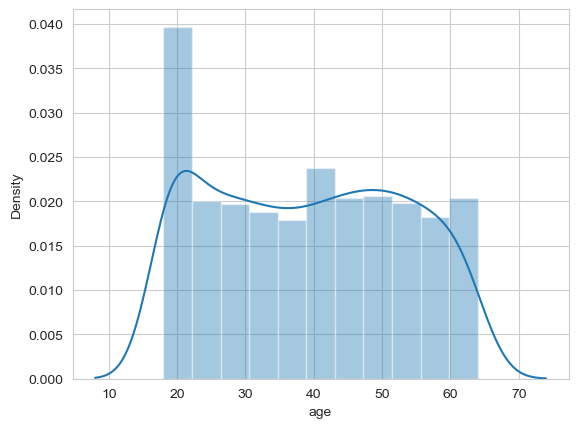

In [11]:
# looking at age distribution

sns.distplot(df['age'])

<Axes: xlabel='charges', ylabel='Count'>

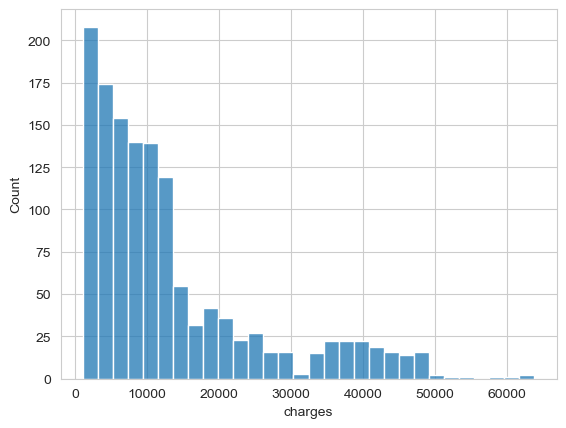

In [12]:
# looking at medical cost distribution

sns.histplot(df['charges'])

<Axes: >

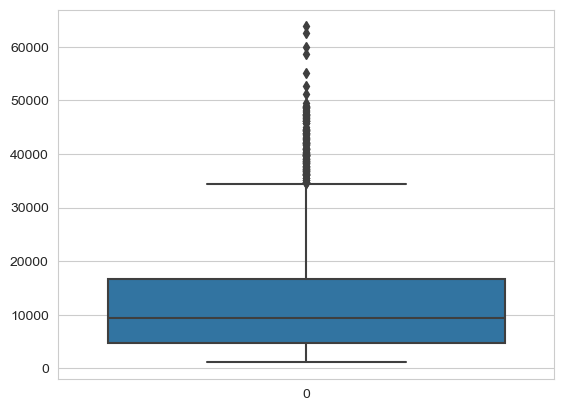

In [13]:
# just to be safe, we also looking at their boxplot

sns.boxplot(df['charges'])

In [14]:
# its interesting because the charges data is skewed to the right, need to keep this in note in case we want to analyze it
# just to be safe, let's measure its mean and median

df_charges_mean = df['charges'].mean()
df_charges_median = df['charges'].median()
print('mean of medical charges: ', df_charges_mean)
print('median of medical charges: ', df_charges_median)

mean of medical charges:  13270.422265141257
median of medical charges:  9382.033


In [18]:
# how many smoker and overweight in the dataset

df_smoker_pop = (df['smoker'] == 'yes').sum()
df_high_bmi_pop = (df['bmi'] > 24.9).sum()
print('smoker percentage: ', (df_smoker_pop/len(df)*100).round(1))
print('high bmi percentage: ', (df_high_bmi_pop/len(df)*100).round(1))

smoker population:  20.5
high bmi population:  81.9


In [19]:
# which one is more expensive medical cost, BMI above 24.9 or lower

df_high_bmi = (df['bmi'] > 24.9)
df_low_bmi = (df['bmi'] < 24.9)

high_bmi_charges = df[df_high_bmi]['charges'].mean()
low_bmi_charges = df[df_low_bmi]['charges'].mean()

print('mean of medical charges with high bmi: ', high_bmi_charges.round(1))
print('mean of medical charges with low bmi: ',low_bmi_charges.round(1))

mean of medical charges with high bmi:  13936.6
mean of medical charges with low bmi:  10253.3


In [44]:
# looks like it is confirmed, high obesity = high medical cost
# let's see the same hold true for smokers

df_smoker = (df['smoker']=='yes')
df_non_smoker = (df['smoker']=='no')

smoker_charges = df[df_smoker]['charges'].mean()
non_smoker_charges = df[df_non_smoker]['charges'].mean()

print('median of medical charges as smoker: ',smoker_charges.round(1))
print('median of medical charges as non_smoker: ', non_smoker_charges.round(1))

median of medical charges as smoker:  32050.2
median of medical charges as non_smoker:  8434.3


In [35]:
# the same also true for smokers
# we conclude that by ranking of least to most expensive medical charges are:
# non_smoker < low bmi < high bmi < smoker
# considering the higher risk for smoker, let's focus our analysis theme as smokers